# **1. Perkenalan Dataset**





Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Menampilkan 5 baris pertama
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
#Cek Missing Value
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Dataset tidak memiliki nilai kosong pada seluruh fitur, sehingga tidak diperlukan penanganan missing value pada tahap eksplorasi. Hal ini menunjukkan kualitas data yang cukup baik untuk dilanjutkan ke tahap preprocessing.

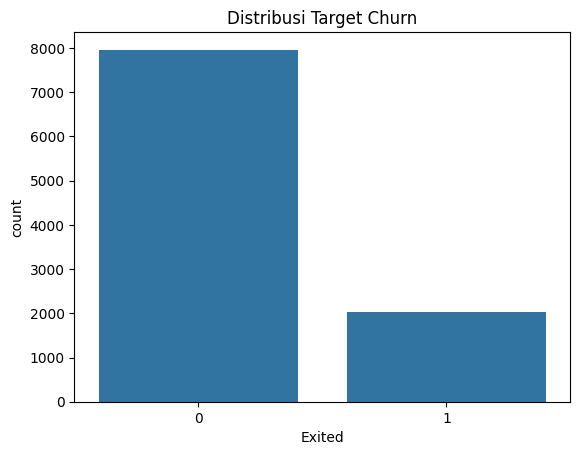

In [6]:
#Distribusi Target (Churn)
sns.countplot(x='Exited', data=df)
plt.title("Distribusi Target Churn")
plt.show()

Distribusi target menunjukkan ketidakseimbangan kelas, di mana jumlah pelanggan yang tidak churn lebih dominan dibandingkan pelanggan churn. Kondisi ini perlu diperhatikan pada tahap pemodelan agar model tidak bias terhadap kelas mayoritas.

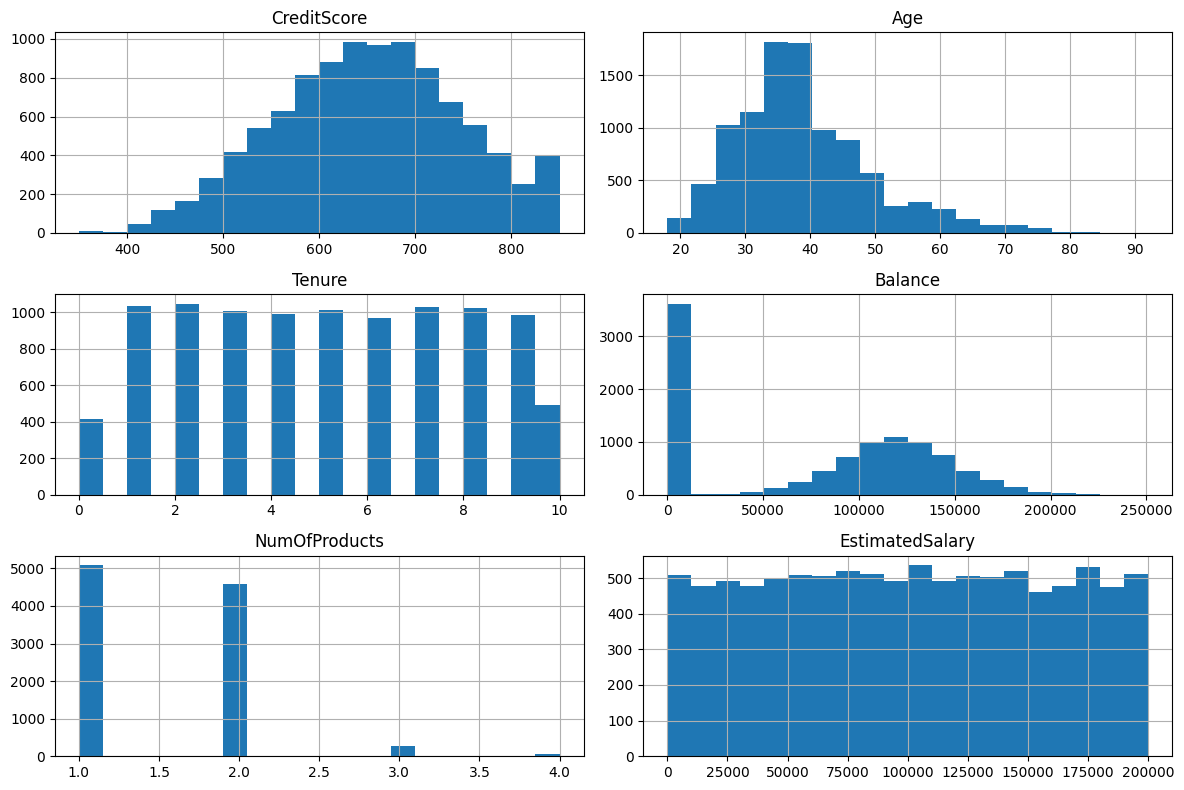

In [7]:
#Distribusi Fitur Numerik
numerical_cols = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]

df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

- CreditScore memiliki sebaran yang relatif normal, sehingga berpotensi menjadi fitur numerik yang informatif setelah dilakukan standarisasi.
- Usia pelanggan cenderung terpusat pada rentang tertentu, dengan sedikit outlier pada usia yang lebih tinggi.
- Lama berlangganan relatif tersebar merata, yang mengindikasikan variasi perilaku pelanggan dalam jangka waktu penggunaan layanan.
- Fitur Balance menunjukkan distribusi yang tidak merata dengan banyak nilai nol, yang dapat mengindikasikan adanya segmen pelanggan tanpa saldo aktif.
- Sebagian besar pelanggan hanya menggunakan satu atau dua produk, yang dapat berpengaruh terhadap kemungkinan churn.
- EstimatedSalary memiliki distribusi yang relatif merata, sehingga perlu dievaluasi lebih lanjut kontribusinya terhadap target churn.

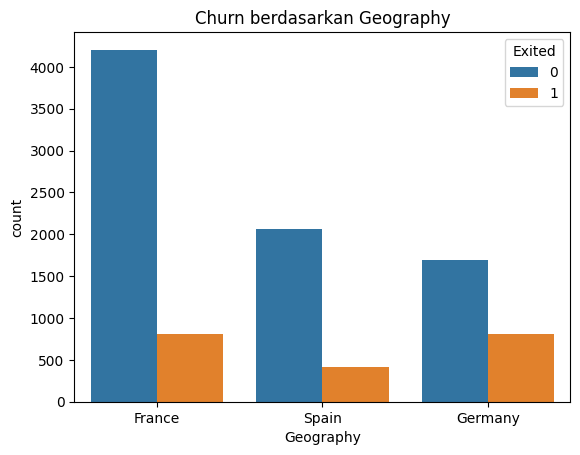

In [8]:
#Analisis Fitur Kategorikal terhadap Churn
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title("Churn berdasarkan Geography")
plt.show()

Tingkat churn terlihat berbeda antar wilayah geografis, yang mengindikasikan bahwa faktor lokasi berpotensi memengaruhi perilaku pelanggan.

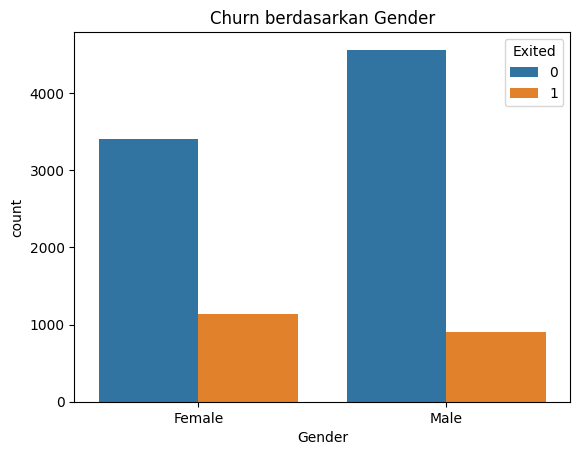

In [9]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Churn berdasarkan Gender")
plt.show()

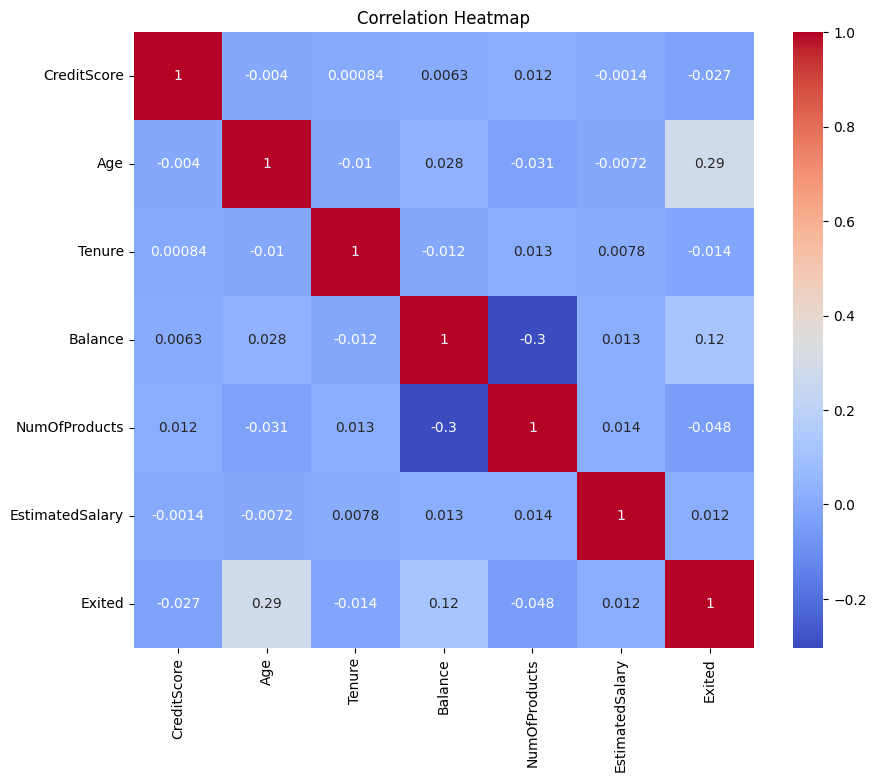

In [10]:
#Korelasi Fitur Numerik
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[numerical_cols + ['Exited']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

**Berdasarkan hasil EDA**, dataset memiliki kualitas data yang baik tanpa missing value. Terdapat ketidakseimbangan kelas pada target churn serta variasi distribusi pada fitur numerik dan kategorikal. Insight ini menjadi dasar dalam menentukan strategi preprocessing dan pemodelan pada tahap selanjutnya.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
df_prep = df.copy()

print("Dataset preprocessing dibuat")
print("Shape awal:", df_prep.shape)

Dataset preprocessing dibuat
Shape awal: (10000, 14)


In [12]:
# Cek missing value (defensive check)
print("\nCek missing value:")
print(df_prep.isnull().sum())

# Tidak ada missing value → tidak dilakukan dropna
print("Tidak ditemukan missing value, data aman")


Cek missing value:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Tidak ditemukan missing value, data aman


In [13]:
#Encoding Data Kategorikal
df_prep['Gender'] = df_prep['Gender'].map({'Male': 0, 'Female': 1})
df_prep['HasCrCard'] = df_prep['HasCrCard'].astype(int)
df_prep['IsActiveMember'] = df_prep['IsActiveMember'].astype(int)

print("\nBinary encoding selesai: Gender, HasCrCard, IsActiveMember")


Binary encoding selesai: Gender, HasCrCard, IsActiveMember


In [14]:
# One-hot Encoding Geography
df_prep = pd.get_dummies(
    df_prep,
    columns=['Geography'],
    drop_first=True
)

print("One-hot encoding selesai untuk Geography")

One-hot encoding selesai untuk Geography


In [15]:
#Menghapus Kolom Identifier
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_prep.drop(columns=cols_to_drop, inplace=True)

print("\nKolom identifier dihapus:", cols_to_drop)
print("Shape setelah drop kolom:", df_prep.shape)


Kolom identifier dihapus: ['RowNumber', 'CustomerId', 'Surname']
Shape setelah drop kolom: (10000, 12)


In [16]:
#Pisahkan Fitur dan Target
X = df_prep.drop('Exited', axis=1)
y = df_prep['Exited']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (10000, 11)
Target shape: (10000,)


In [17]:
# Deteksi outlier sederhana dengan IQR (observasi)
numerical_cols = ['CreditScore', 'Age', 'Tenure',
                  'Balance', 'NumOfProducts', 'EstimatedSalary']

outlier_summary = {}

for col in numerical_cols:
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((df_prep[col] < lower) | (df_prep[col] > upper)).sum()
    outlier_summary[col] = outliers

print("Jumlah outlier per fitur:")
for k, v in outlier_summary.items():
    print(f"{k}: {v}")

print("Tidak dilakukan penghapusan atau clipping karena outlier masih dalam batas wajar")


Jumlah outlier per fitur:
CreditScore: 15
Age: 359
Tenure: 0
Balance: 0
NumOfProducts: 60
EstimatedSalary: 0
Tidak dilakukan penghapusan atau clipping karena outlier masih dalam batas wajar


In [18]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train–Test Split selesai")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

Train–Test Split selesai
X_train: (8000, 11)
X_test : (2000, 11)


In [19]:
#Standarisasi Fitur Numerik
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [20]:
output_dir = "churnmodelling_preprocessing"
os.makedirs(output_dir, exist_ok=True)

train_data = pd.concat([X_train, y_train], axis=1)

output_path = os.path.join(output_dir, "customer_churn_preprocessed.csv")
train_data.to_csv(output_path, index=False)

print("Dataset preprocessing berhasil disimpan")
print("Lokasi:", output_path)

Dataset preprocessing berhasil disimpan
Lokasi: churnmodelling_preprocessing/customer_churn_preprocessed.csv
